# Imports and data

In [1]:
import special_data_reader
import stats_utils
import model_utils
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
pulls = special_data_reader.read_data(f'Data/Raw/pulls.csv')

# Goodness of fit analysis for null distribution

In [3]:
filtered_data = pulls[(pulls['grouped'] == 'f') & (pulls['rarity'] == 5) & (pulls['guaranteed'] == 'f') 
                    & (pulls['bannerId'] > 200000) & (pulls['bannerId'] < 300000)]

In [4]:
true_counts, expected_counts = stats_utils.data_for_metric(
    filtered_data, prob=0.006, pity_cutoff=90)

In [5]:
true_counts = true_counts[:-1]
expected_counts = expected_counts[:-1]

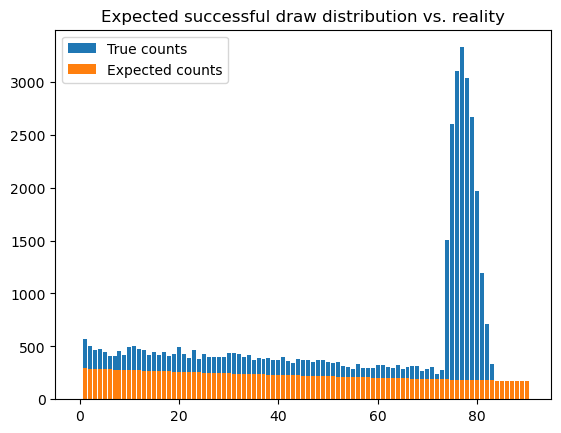

In [6]:
plt.clf()
plt.bar(list(range(len(true_counts))), true_counts, label='True counts')
plt.bar(list(range(len(expected_counts))), expected_counts, label='Expected counts')
plt.title('Expected successful draw distribution vs. reality')
plt.legend()
plt.show()

In [7]:
error = stats_utils.null_metric(
    pulls, prob=0.006, pity_cutoff=90)

In [8]:
error

1.7187049222868278

# GOF for fit model

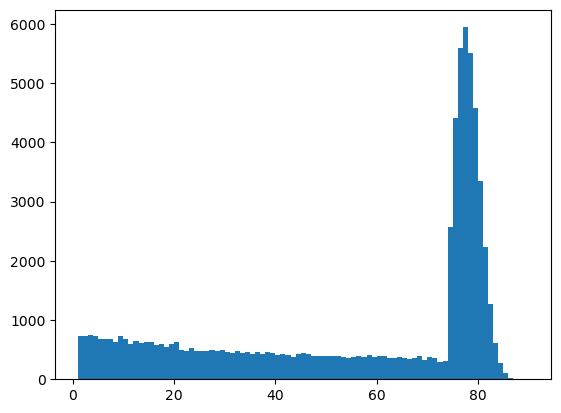

In [9]:
probs = model_utils.get_probs(pulls)

In [10]:
gaussian_mean = 76
gaussian_var = 2.45
cutoff = 73

fit_data = model_utils.fit_mixture(probs, gaussian_mean, gaussian_var, cutoff)

0.8815432098765431
gauss sum: 0.9248687107765219
geom sum: 0.4831354130670022


In [11]:
fit_data = np.array(fit_data) * true_counts.sum()

In [12]:
total = true_counts.sum()

abs_difference = np.absolute(true_counts - fit_data).sum()
abs_difference /= total

ValueError: operands could not be broadcast together with shapes (91,) (89,) 

In [26]:
p_value

0.0

In [27]:
inp = range(1, len(fit_data) + 1)

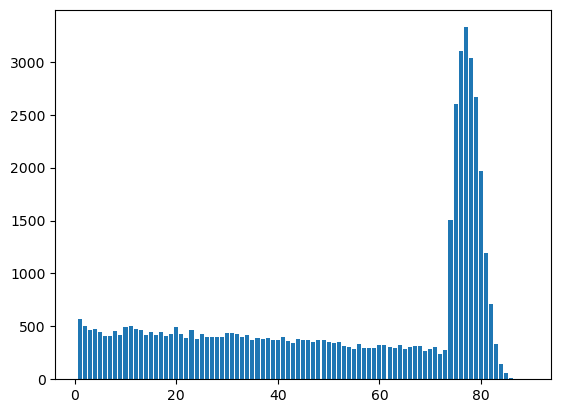

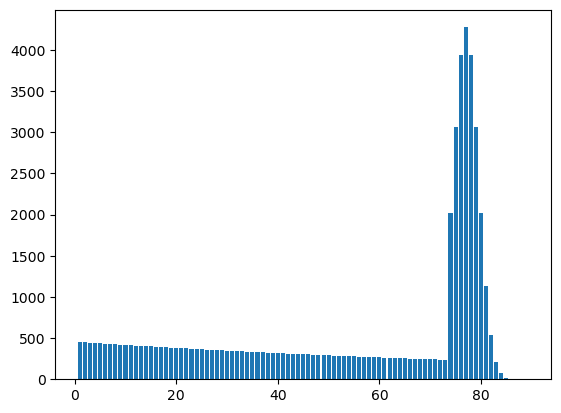

In [28]:
plt.bar(inp, true_counts[1:-1])
plt.show()

plt.bar(inp, fit_data)
plt.show()